**VERİ SETİ YÜKLEME , VERİ ÖN İŞLEME VE VERİ AYIKLAMA**

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Glassdoor Gender Pay Gap.csv")

In [68]:
print(data.isnull().sum())
data = data.dropna()
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)
data.columns = data.columns.str.strip()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64
              JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   

In [69]:
data['TotalPay'] = data['BasePay'] + data['Bonus']
data.head()

JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  TotalPay  
0          2    42363   9938     52301  
1          5   108476  11128    119604  
2          5    90208   9268     99476  
3          4   108080  10154    118234  
4          5    99464   9319    108783

**GÖRSELLEŞTİRMELER**

In [ ]:
#JobTitle'içindeki başlıkları türkçe çevirdik.Görselleştirmek için
rename_job_dict = {
    'Graphic Designer': 'Grafik Tasarımcı',
    'Software Engineer': 'Yazılım Mühendisi',
    'Warehouse Associate': 'Depo Elemanı',
    'IT': 'Bilişim Uzmanı',
    'Sales Associate': 'Satış Temsilcisi',
    'Driver': 'Şoför',
    'Financial Analyst': 'Finans Analisti',
    'Marketing Associate': 'Pazarlama Uzmanı',
    'Data Scientist': 'Veri Bilimci',
    'Manager': 'Yönetici',
}

rename_education_dict = {
    'College': 'Üniversite',
    'PhD': 'Doktora',
    'Masters': 'Yüksek Lisans',
    'High School': 'Lise'

}
rename_gender_dict= {'Female':'Kadın',
                     'Male': 'Erkek',
                     'Gender': 'Cinsiyet'}

# Sütun adlarını değiştirme
data['JobTitle'] = data['JobTitle'].replace(rename_job_dict)
data['Education'] = data['Education'].replace(rename_education_dict)
data['Gender'] = data['Gender'].replace(rename_gender_dict)

#Güncellenmiş değerleri kontrol etme
print("\nGüncellenmiş İş Unvanları:")
print(data['JobTitle'].unique())
print("\nGüncellenmiş Eğitim Düzeyleri:")
print(data['Education'].unique())
print(data.head())


Güncellenmiş İş Unvanları:
['Grafik Tasarımcı' 'Yazılım Mühendisi' 'Depo Elemanı' 'Bilişim Uzmanı'
 'Satış Temsilcisi' 'Şoför' 'Finans Analisti' 'Pazarlama Uzmanı'
 'Veri Bilimci' 'Yönetici']

Güncellenmiş Eğitim Düzeyleri:
['Üniversite' 'Doktora' 'Yüksek Lisans' 'Lise']
            JobTitle Gender  Age  PerfEval      Education            Dept  \
0   Grafik Tasarımcı  Kadın   18         5     Üniversite      Operations   
1  Yazılım Mühendisi  Erkek   21         5     Üniversite      Management   
2       Depo Elemanı  Kadın   19         4        Doktora  Administration   
3  Yazılım Mühendisi  Erkek   20         5  Yüksek Lisans           Sales   
4   Grafik Tasarımcı  Erkek   26         5  Yüksek Lisans     Engineering   

   Seniority  BasePay  Bonus  TotalPay  
0          2    42363   9938     52301  
1          5   108476  11128    119604  
2          5    90208   9268     99476  
3          4   108080  10154    118234  
4          5    99464   9319    108783  


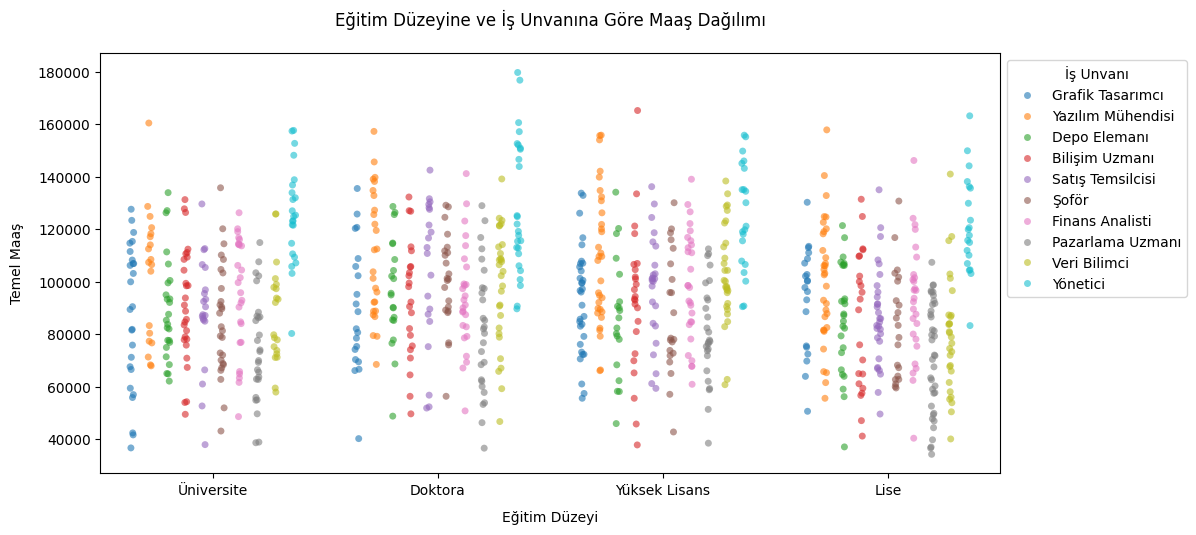

In [ ]:
#1.Görsellestirme - Strip Plot grafiği
#Eğitim Düzeyine göre dağılım
plt.figure(figsize=(12, 6))
sns.stripplot(x='Education', y='BasePay', hue='JobTitle', data=data, jitter=True, dodge=True, alpha=0.6)
plt.title('Eğitim Düzeyine ve İş Unvanına Göre Maaş Dağılımı', pad=20)
plt.xlabel('Eğitim Düzeyi', labelpad=10)
plt.ylabel('Temel Maaş', labelpad=10)
plt.xticks(rotation=0)
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.2)
education_order = ['Lise', 'Üniversite', 'Yüksek Lisans', 'Doktora']
data['Education'] = pd.Categorical(data['Education'], categories=education_order, ordered=True)
pivot_table = data.pivot_table(values='Bonus', index='JobTitle', columns='Gender', aggfunc='mean')
plt.legend(title='İş Unvanı', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

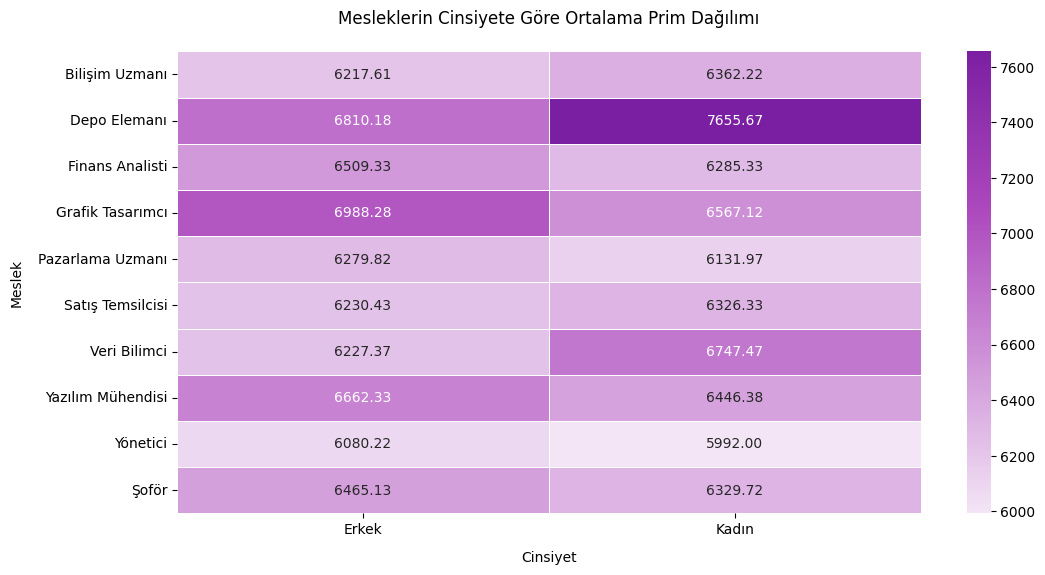

In [ ]:
#2.Görselleştirme - Isı Harıtası grafiği
#Prim Dağılımı
from matplotlib.colors import LinearSegmentedColormap
colors = ['#F3E5F5', '#CE93D8', '#AB47BC', '#7B1FA2']
priv_cmap = LinearSegmentedColormap.from_list('priv_cmap', colors)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap=priv_cmap, fmt='.2f', linewidths=0.5)
plt.title('Mesleklerin Cinsiyete Göre Ortalama Prim Dağılımı', pad=20)
plt.ylabel('Meslek', labelpad=10)
plt.xlabel('Cinsiyet', labelpad=10)
plt.show()

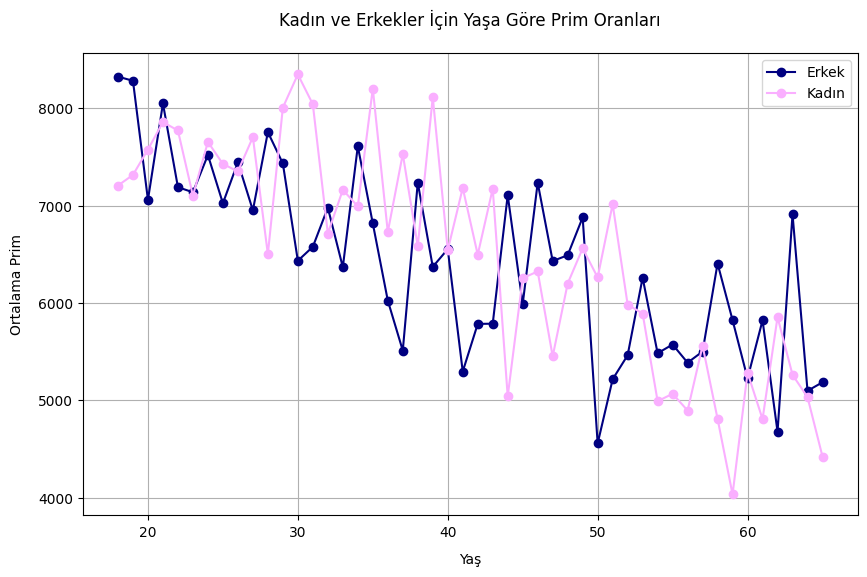

In [ ]:
#3.Görselleştirme  - Bar Chart grafiği
#Yaşa Göre Anlatım
prim_yas_cinsiyet = data.groupby(['Age', 'Gender'])['Bonus'].mean().unstack()
plt.figure(figsize=(10, 6))
plt.plot(prim_yas_cinsiyet.index, prim_yas_cinsiyet['Erkek'], label='Erkek', marker='o', color='navy')
plt.plot(prim_yas_cinsiyet.index, prim_yas_cinsiyet['Kadın'], label='Kadın', marker='o', color='#FAAFFF')
plt.title('Kadın ve Erkekler İçin Yaşa Göre Prim Oranları', pad=20)
plt.xlabel('Yaş',labelpad=10)
plt.ylabel('Ortalama Prim',labelpad=10)
plt.legend()
plt.grid(True)
plt.show()

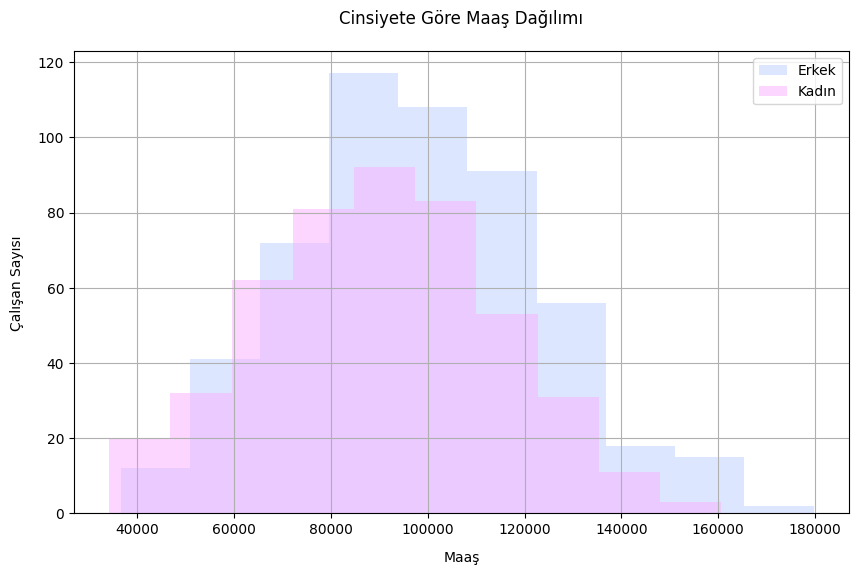

In [ ]:
#4.Görselleştirme - Histogram grafiği
# Cinsiyete göre maaş dağılımı
data = data.dropna(subset=['BasePay'])
plt.figure(figsize=(10, 6))
data[data['Gender'] == 'Erkek']['BasePay'].hist(bins=10, alpha=0.5, label='Erkek', color='#BBCFFF')
data[data['Gender'] == 'Kadın']['BasePay'].hist(bins=10, alpha=0.5, label='Kadın', color='#FAAFFF')
plt.title('Cinsiyete Göre Maaş Dağılımı', pad=20)
plt.xlabel('Maaş', labelpad=10)
plt.ylabel('Çalışan Sayısı', labelpad=10)
plt.legend()
plt.show()

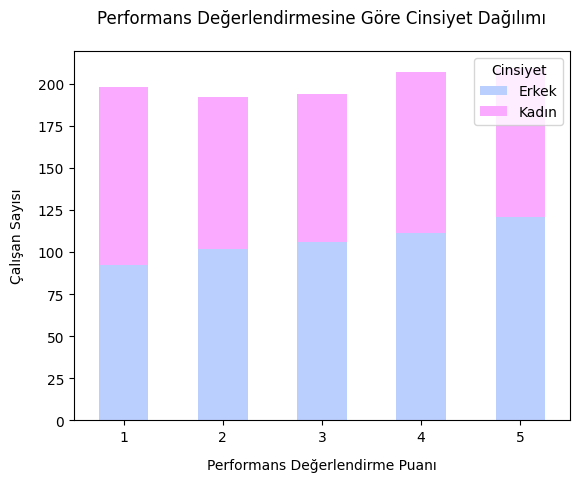

In [ ]:
#5.Görselleştirme - Çubuk grafiği
# Performans değerlendirme puanına göre cinsiyet dağılımı
P_degerlendirme_cinsiyet = data.groupby(['PerfEval', 'Gender']).size().unstack(fill_value=0)
P_degerlendirme_cinsiyet.plot(kind='bar', stacked=True, color=['#BBCFFF', '#FAAAFF'])
plt.title('Performans Değerlendirmesine Göre Cinsiyet Dağılımı', pad=20)
plt.xlabel('Performans Değerlendirme Puanı',labelpad=10)
plt.ylabel('Çalışan Sayısı',labelpad=10)
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet')
plt.show()

In [ ]:
# 6.Görselleştirme - Çubuk grafiği
# Cinsiyete ve Eğitim Düzeyine Göre Meslek Gruplarında Ortalama Maaşlar
import plotly.graph_objects as go

# Veriyi yükle
data = pd.read_csv("/content/Glassdoor Gender Pay Gap.csv")

# Sütun adlarını düzenle
data.columns = [col.strip() for col in data.columns]  # Boşlukları temizle

# Verileri listeye dönüştür
data_list = data.values.tolist()

# Meslekleri kontrol etmek için belirlenen liste
it_jobs_w_phd = []
it_jobs_w_nonphd = []
it_jobs_m_phd = []
it_jobs_m_nonphd = []

graphic_designer_jobs_w_phd = []
graphic_designer_jobs_w_nonphd = []
graphic_designer_jobs_m_phd = []
graphic_designer_jobs_m_nonphd = []

data_scientist_jobs_w_phd = []
data_scientist_jobs_w_nonphd = []
data_scientist_jobs_m_phd = []
data_scientist_jobs_m_nonphd = []

software_engineer_jobs_w_phd = []
software_engineer_jobs_w_nonphd = []
software_engineer_jobs_m_phd = []
software_engineer_jobs_m_nonphd = []

# Listeyi kontrol et ve uygun satırları ekle
for row in data_list:
    job_title = row[0]
    gender = row[1]
    education_level = row[4]  # 4. sütun, eğitim düzeyi

    if job_title == 'IT':
        if gender == 'Female':
            if education_level == 'PhD':
                it_jobs_w_phd.append(row)
            else:
                it_jobs_w_nonphd.append(row)
        elif gender == 'Male':
            if education_level == 'PhD':
                it_jobs_m_phd.append(row)
            else:
                it_jobs_m_nonphd.append(row)

    elif job_title == 'Graphic Designer':
        if gender == 'Female':
            if education_level == 'PhD':
                graphic_designer_jobs_w_phd.append(row)
            else:
                graphic_designer_jobs_w_nonphd.append(row)
        elif gender == 'Male':
            if education_level == 'PhD':
                graphic_designer_jobs_m_phd.append(row)
            else:
                graphic_designer_jobs_m_nonphd.append(row)

    elif job_title == 'Data Scientist':
        if gender == 'Female':
            if education_level == 'PhD':
                data_scientist_jobs_w_phd.append(row)
            else:
                data_scientist_jobs_w_nonphd.append(row)
        elif gender == 'Male':
            if education_level == 'PhD':
                data_scientist_jobs_m_phd.append(row)
            else:
                data_scientist_jobs_m_nonphd.append(row)

    elif job_title == 'Software Engineer':
        if gender == 'Female':
            if education_level == 'PhD':
                software_engineer_jobs_w_phd.append(row)
            else:
                software_engineer_jobs_w_nonphd.append(row)
        elif gender == 'Male':
            if education_level == 'PhD':
                software_engineer_jobs_m_phd.append(row)
            else:
                software_engineer_jobs_m_nonphd.append(row)

# Ortalama maaş hesaplama fonksiyonu
def calculate_average_salary(jobs):
    if jobs:  # Eğer liste boş değilse
        total_salary = 0
        count = 0
        for row in jobs:
            try:
                total_salary += float(row[7])  # 8. sütun (7. indeks) maaşlar
                count += 1
            except ValueError:
                print(f"Geçersiz maaş verisi: {row[7]}")
        average_salary = total_salary / count if count > 0 else 0  # Ortalama maaş
        return average_salary
    return 0  # Liste boşsa 0 döner

# Ortalama maaşları hesapla
average_it_w_phd = calculate_average_salary(it_jobs_w_phd)
average_it_w_nonphd = calculate_average_salary(it_jobs_w_nonphd)
average_it_m_phd = calculate_average_salary(it_jobs_m_phd)
average_it_m_nonphd = calculate_average_salary(it_jobs_m_nonphd)

average_graphic_designer_w_phd = calculate_average_salary(graphic_designer_jobs_w_phd)
average_graphic_designer_w_nonphd = calculate_average_salary(graphic_designer_jobs_w_nonphd)
average_graphic_designer_m_phd = calculate_average_salary(graphic_designer_jobs_m_phd)
average_graphic_designer_m_nonphd = calculate_average_salary(graphic_designer_jobs_m_nonphd)

average_data_scientist_w_phd = calculate_average_salary(data_scientist_jobs_w_phd)
average_data_scientist_w_nonphd = calculate_average_salary(data_scientist_jobs_w_nonphd)
average_data_scientist_m_phd = calculate_average_salary(data_scientist_jobs_m_phd)
average_data_scientist_m_nonphd = calculate_average_salary(data_scientist_jobs_m_nonphd)

average_software_engineer_w_phd = calculate_average_salary(software_engineer_jobs_w_phd)
average_software_engineer_w_nonphd = calculate_average_salary(software_engineer_jobs_w_nonphd)
average_software_engineer_m_phd = calculate_average_salary(software_engineer_jobs_m_phd)
average_software_engineer_m_nonphd = calculate_average_salary(software_engineer_jobs_m_nonphd)

# Ortalama maaş verilerini düzenle
professions = ['Bilişim Uzmanı', 'Yazılım Mühendisi', 'Grafik Mühendisi', 'Veri Bilimci']

# Kadın ve erkek maaşları için PhD ve NonPhD çubukları
female_salaries_phd = [average_it_w_phd, average_software_engineer_w_phd, average_graphic_designer_w_phd, average_data_scientist_w_phd]
female_salaries_nonphd = [average_it_w_nonphd, average_software_engineer_w_nonphd, average_graphic_designer_w_nonphd, average_data_scientist_w_nonphd]
male_salaries_phd = [average_it_m_phd, average_software_engineer_m_phd, average_graphic_designer_m_phd, average_data_scientist_m_phd]
male_salaries_nonphd = [average_it_m_nonphd, average_software_engineer_m_nonphd, average_graphic_designer_m_nonphd, average_data_scientist_m_nonphd]

# Grafik oluşturma
fig = go.Figure()

# Kadın maaşları için PhD çubuk
fig.add_trace(go.Bar(
    x=professions,
    y=female_salaries_phd,
    name='Kadın - PhD',
    marker_color='#FFE1FF'
))

# Kadın maaşları için Non-PhD çubuk
fig.add_trace(go.Bar(
    x=professions,
    y=female_salaries_nonphd,
    name='Kadın - NonPhD',
    marker_color='#E4B1F0'
))

# Erkek maaşları için PhD çubuk
fig.add_trace(go.Bar(
    x=professions,
    y=male_salaries_phd,
    name='Erkek - PhD',
    marker_color='#7E60BF'
))

# Erkek maaşları için Non-PhD çubuk
fig.add_trace(go.Bar(
    x=professions,
    y=male_salaries_nonphd,
    name='Erkek - NonPhD',
    marker_color='#433878'
))

# Grafik başlıkları ve etiketler
fig.update_layout(
    title='Cinsiyete ve Eğitim Düzeyine Göre Meslek Gruplarında Ortalama Maaşlar',
    xaxis_title='Meslek Grupları',
    yaxis_title='Ortalama Maaş',
    barmode='group'

)

# Grafiği göster
fig.show()
# IT meslek grubu için ortalama maaşları ekrana yazdır
print("IT (Kadın - PhD):", average_it_w_phd)
print("IT (Kadın - NonPhD):", average_it_w_nonphd)
print("IT (Erkek - PhD):", average_it_m_phd)
print("IT (Erkek - NonPhD):", average_it_m_nonphd)

# Graphic Designer meslek grubu için ortalama maaşları ekrana yazdır
print("Graphic Designer (Kadın - PhD):", average_graphic_designer_w_phd)
print("Graphic Designer (Kadın - NonPhD):", average_graphic_designer_w_nonphd)
print("Graphic Designer (Erkek - PhD):", average_graphic_designer_m_phd)
print("Graphic Designer (Erkek - NonPhD):", average_graphic_designer_m_nonphd)

# Data Scientist meslek grubu için ortalama maaşları ekrana yazdır
print("Data Scientist (Kadın - PhD):", average_data_scientist_w_phd)
print("Data Scientist (Kadın - NonPhD):", average_data_scientist_w_nonphd)
print("Data Scientist (Erkek - PhD):", average_data_scientist_m_phd)
print("Data Scientist (Erkek - NonPhD):", average_data_scientist_m_nonphd)

# Software Engineer meslek grubu için ortalama maaşları ekrana yazdır
print("Software Engineer (Kadın - PhD):", average_software_engineer_w_phd)
print("Software Engineer (Kadın - NonPhD):", average_software_engineer_w_nonphd)
print("Software Engineer (Erkek - PhD):", average_software_engineer_m_phd)
print("Software Engineer (Erkek - NonPhD):", average_software_engineer_m_nonphd)


IT (Kadın - PhD): 101827.66666666667
IT (Kadın - NonPhD): 86890.8947368421
IT (Erkek - PhD): 82738.3
IT (Erkek - NonPhD): 93323.0
Graphic Designer (Kadın - PhD): 94545.5
Graphic Designer (Kadın - NonPhD): 91637.44736842105
Graphic Designer (Erkek - PhD): 85227.1
Graphic Designer (Erkek - NonPhD): 90687.975
Data Scientist (Kadın - PhD): 98767.75
Data Scientist (Kadın - NonPhD): 94380.27027027027
Data Scientist (Erkek - PhD): 97640.61538461539
Data Scientist (Erkek - NonPhD): 86553.51219512195
Software Engineer (Kadın - PhD): 89871.66666666667
Software Engineer (Kadın - NonPhD): 97598.6
Software Engineer (Erkek - PhD): 112975.69565217392
Software Engineer (Erkek - NonPhD): 104424.08974358975


In [ ]:
# 7.Görselleştirme - Kutu grafiği
# IT Kadın ve Erkek PhD ve Non-PhD Ortalama Maaş Dağılımları
import pandas as pd
import plotly.graph_objects as go
data = pd.read_csv("/content/Glassdoor Gender Pay Gap.csv")

# Sütun adlarını düzenle
data.columns = [col.strip() for col in data.columns]  # Boşlukları temizle

# Verileri listeye dönüştür
data_list = data.values.tolist()

# Kadın ve erkek IT verilerini hazırlama
it_jobs_w_phd = []
it_jobs_w_nonphd = []
it_jobs_m_phd = []
it_jobs_m_nonphd = []

# Listeyi kontrol et ve uygun satırları ekle
for row in data_list:
    job_title = row[0].strip()
    gender = row[1].strip()
    education_level = row[4].strip()  # 4. sütun, eğitim düzeyi

    if job_title == 'IT':
        if gender == 'Female':
            if education_level == 'PhD':
                it_jobs_w_phd.append(float(row[7]))  # 8. sütun (maaş)
            else:
                it_jobs_w_nonphd.append(float(row[7]))  # 8. sütun (maaş)
        elif gender == 'Male':
            if education_level == 'PhD':
                it_jobs_m_phd.append(float(row[7]))  # 8. sütun (maaş)
            else:
                it_jobs_m_nonphd.append(float(row[7]))  # 8. sütun (maaş)

# Box plot oluşturma
fig = go.Figure()

# Kadın IT PhD maaşları
fig.add_trace(go.Box(
    y=it_jobs_w_phd,
    name='Kadın (PhD)',
    marker=dict(color='rgb(67, 56, 120)')  # Renk kodu
))

# Kadın IT Non-PhD maaşları
fig.add_trace(go.Box(
    y=it_jobs_w_nonphd,
    name='Kadın (Non-PhD)',
    marker=dict(color='rgb(126, 96, 191)')  # Renk kodu
))

# Erkek IT PhD maaşları
fig.add_trace(go.Box(
    y=it_jobs_m_phd,
    name='Erkek (PhD)',
    marker=dict(color='rgb(228, 177, 240)')  # Renk kodu
))

# Erkek IT Non-PhD maaşları
fig.add_trace(go.Box(
    y=it_jobs_m_nonphd,
    name='Erkek (Non-PhD)',
    marker=dict(color='rgb(255, 225, 255)')  # Renk kodu
))

# Grafik başlıkları ve düzenlemeler
fig.update_layout(
    title='IT Kadın ve Erkek PhD ve Non-PhD Ortalama Maaş Dağılımları',
    yaxis_title='Maaş',
    boxmode='group'  # Gruplu kutu grafiği
)

# Grafiği göster
fig.show()

            JobTitle Gender       TotalPay
0     Bilişim Uzmanı  Erkek   97239.586957
1     Bilişim Uzmanı  Kadın   96837.940000
2   Grafik Tasarımcı  Erkek   96584.080000
3   Grafik Tasarımcı  Kadın   98810.416667
4       Veri Bilimci  Erkek   95450.000000
5       Veri Bilimci  Kadın  102452.264151
6  Yazılım Mühendisi  Erkek  113033.811881
7  Yazılım Mühendisi  Kadın  101147.375000


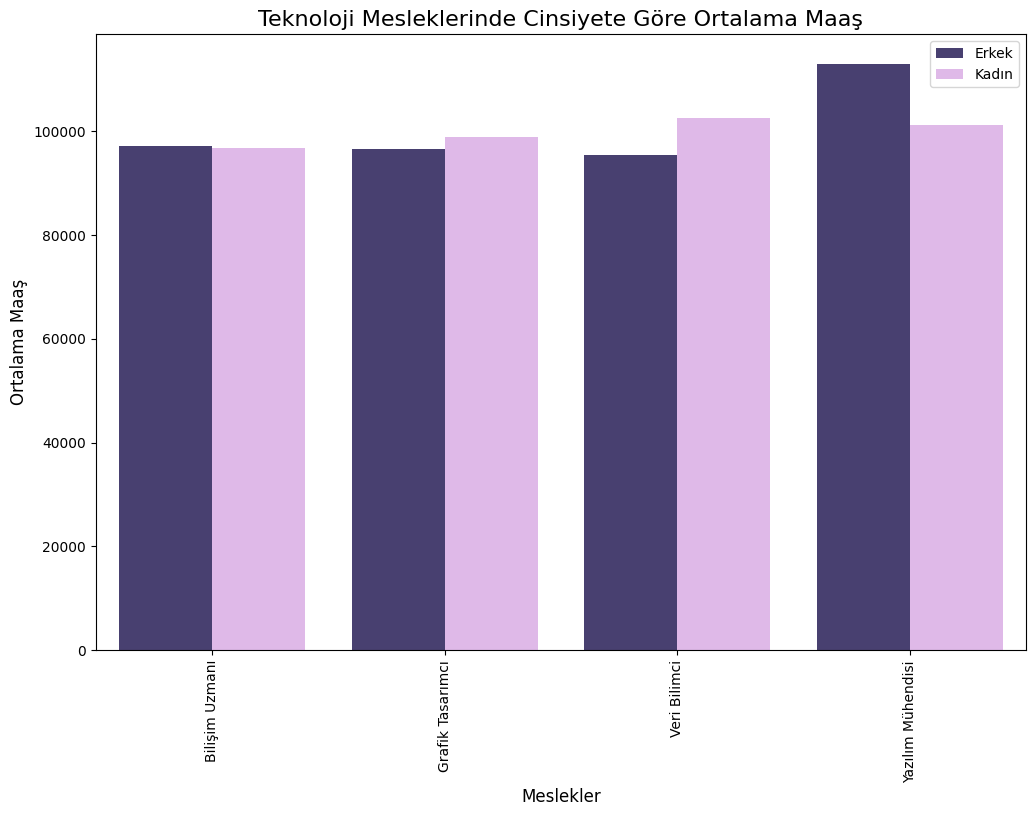

In [ ]:
# 8.Görselleştirme - Çubuk grafiği
# Teknoloji Mesleklerinde Cinsiyete Göre Ortalama Maaş

tech_jobs = data[data['JobTitle'].str.contains('Grafik Tasarımcı|Yazılım Mühendisi|Bilişim Uzmanı|Veri Bilimci', case=False, na=False)]

# Gruplama: Cinsiyet ve iş başlığına göre ortalama maaşları hesaplayalım
avg_salary = tech_jobs.groupby(['JobTitle', 'Gender'])['TotalPay'].mean().reset_index()

# Gruplanmış veriyi inceleyelim
print(avg_salary)

# Veriyi görselleştirelim
plt.figure(figsize=(12,8))

# Seçilen renkleri bir grafikte kullan
sns.barplot(x='JobTitle', y='TotalPay', hue='Gender', data=avg_salary, palette =['#433878', '#E4B1F0'])

# Grafik başlıkları ve etiketler
plt.title('Teknoloji Mesleklerinde Cinsiyete Göre Ortalama Maaş', fontsize=16)
plt.xlabel('Meslekler', fontsize=12)
plt.ylabel('Ortalama Maaş', fontsize=12)
plt.xticks(rotation=90)  # X eksenindeki iş başlıklarını döndürerek okunabilir hale getiriyoruz
plt.legend()
# Grafiği gösterelim
plt.show()

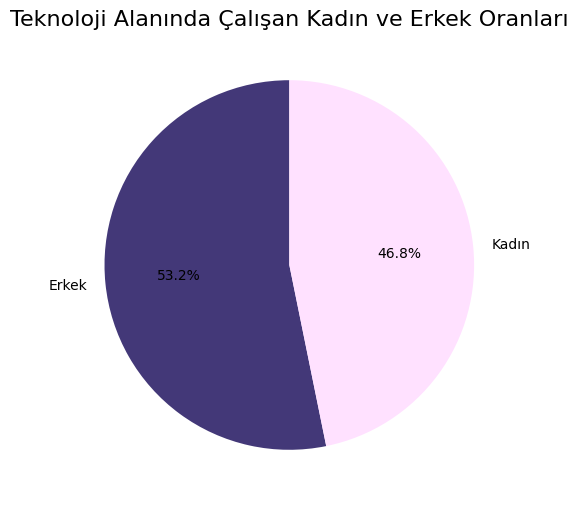

In [ ]:
# 9.Görselleştirme - Pasta grafiği
# Teknoloji Alanında Çalışan Kadın ve Erkek Oranları

import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle (Dosya yolunu kendi dosyanıza göre değiştirin
# Teknoloji alanında çalışanları filtrele (örneğin, 'Department' sütununda 'Technology' varsa)
# Eğer departman bilgisi yoksa, bu kısmı atlayabilirsiniz.
# data = data[data['Department'] == 'Technology']

# Cinsiyete göre gruplandır ve say
gender_counts = data['Gender'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#433878', '#FFE1FF'], startangle=90)

# Başlık ekle
plt.title("Teknoloji Alanında Çalışan Kadın ve Erkek Oranları", fontsize=16)

# Grafiği göster
plt.show()



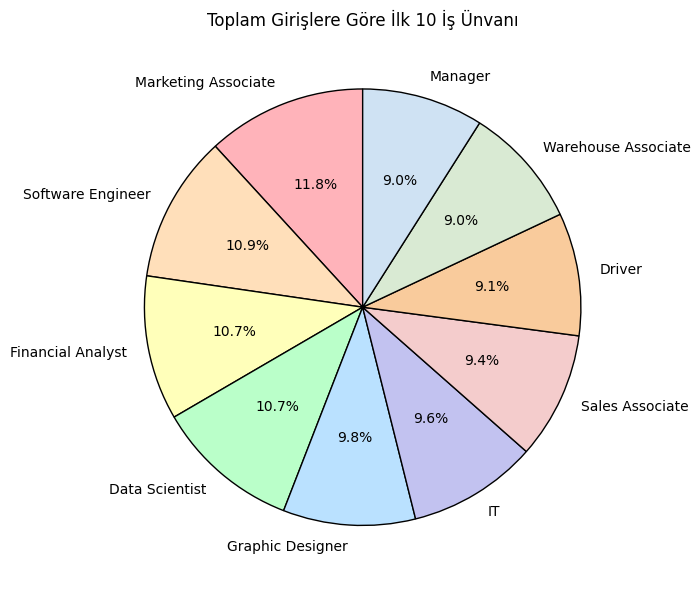

In [ ]:
# 10.Görselleştirme - Pasta grafiği
# Toplam Girişlere Göre İlk 10 İş Ünvanı

# İş başlıklarının gruplandırılması ve sıralanması
title_counts = data['JobTitle'].value_counts().sort_values(ascending=False)

# Pie chart oluşturma
plt.figure(figsize=(12, 6))
title_counts[:10].plot(kind='pie',
                       colors=['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#c2c2f0', '#f4cccc', '#f9cb9c', '#d9ead3', '#cfe2f3'],  # Pastel tonlar
                       autopct='%1.1f%%',  # Dilimlerde yüzde gösterimi
                       startangle=90,  # Daha iyi bir dönüş açısı için başlama açısı
                       wedgeprops={'edgecolor': 'black'})  # Dilim kenarlarına siyah sınır ekler

plt.title('Toplam Girişlere Göre İlk 10 İş Ünvanı')
plt.ylabel('')  # Y-etiketini gizleme

# Sütun adlarını değiştirme
data['JobTitle'] = data['JobTitle'].replace(rename_job_dict)
data['Education'] = data['Education'].replace(rename_education_dict)

# Grafik düzenini optimize etme
plt.tight_layout()
plt.show()

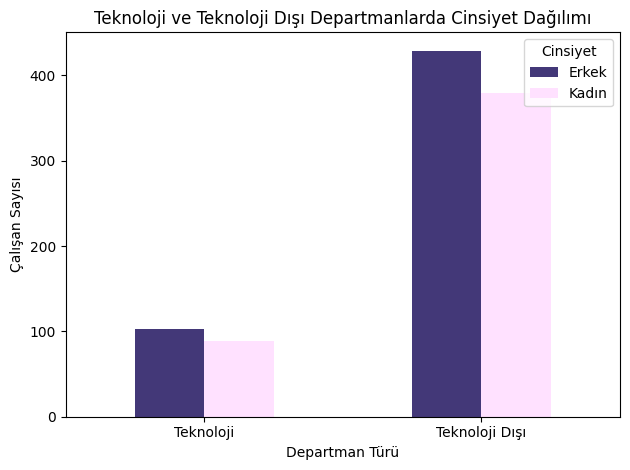

In [ ]:
# 11.Görselleştirme - Çubuk grafiği
# Teknoloji ve Teknoloji Dışı Departmanlarda Cinsiyet Dağılımı

import pandas as pd
import matplotlib.pyplot as plt


tech_departments = ['Engineering', 'IT', 'Development']


data['Is_Tech'] = data['Dept'].apply(lambda dept: 'Teknoloji' if dept in tech_departments else 'Teknoloji Dışı')


data['Cinsiyet'] = data['Gender'].apply(lambda gender: 'Erkek' if gender == 'Male' else 'Kadın')

# Veriyi cinsiyet ve departman türüne göre grupla
grouped_data = data.groupby(['Is_Tech', 'Cinsiyet']).size().unstack()

# Sonuçları görselleştir
grouped_data.plot(kind='bar', stacked=False, color=[ '#433878','#FFE1FF'])

# Grafiği özelleştir
plt.title('Teknoloji ve Teknoloji Dışı Departmanlarda Cinsiyet Dağılımı')
plt.xlabel('Departman Türü')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=0)
plt.legend(title='Cinsiyet', loc='upper right')

# Grafiği göster
plt.tight_layout()
plt.show()

<ipython-input-83-0bc0bda20375>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



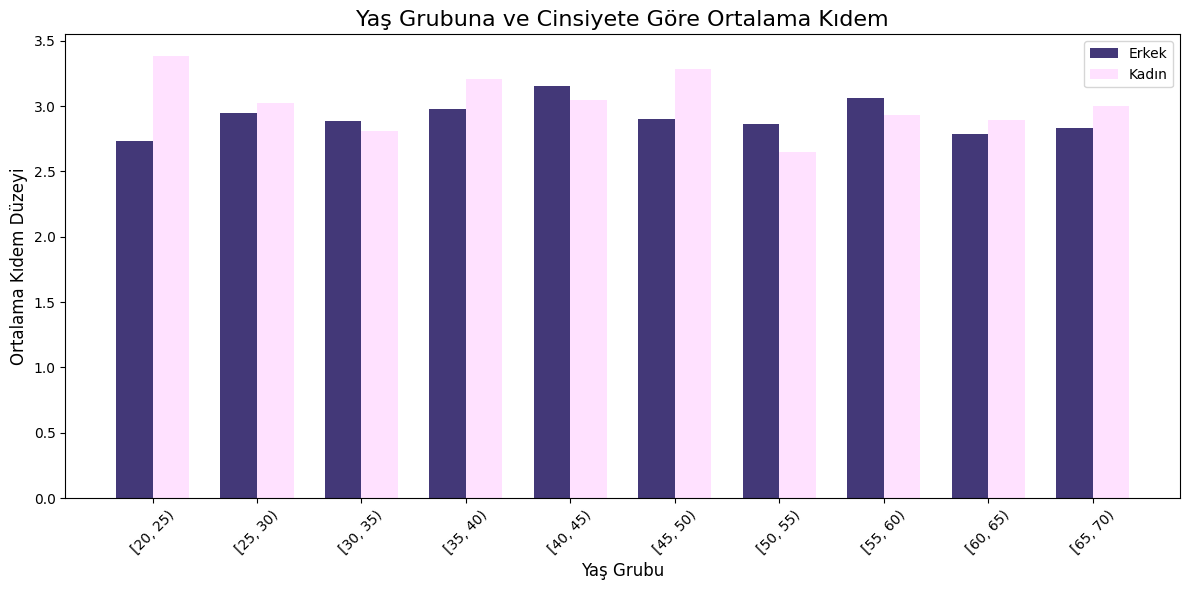

In [ ]:
# 12.Görselleştirme - Çubuk grafiği
# Yaş Grubuna ve Cinsiyete Göre Ortalama Kıdem
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 5'er yıllık yaş aralıkları oluştur
bins = range(20, 71, 5)  # 20'den 70'e kadar, 5'er yıllık aralıklar
data['Yaş Grubu'] = pd.cut(data['Age'], bins, right=False)  # Yaşları gruplara ayır

# Yaş Grubu ve Cinsiyete göre kıdem ortalamalarını hesapla
grouped_data = data.groupby(['Yaş Grubu', 'Gender'])['Seniority'].mean().unstack()

# Sütun grafiği oluştur
plt.figure(figsize=(12,6))

# Çubuk genişliği ve pozisyonları
bar_width = 0.35
index = np.arange(len(grouped_data.index))  # yaş grupları

# Erkekler ve kadınlar için çubuklar oluştur
plt.bar(index, grouped_data['Male'], bar_width, label='Erkek', color='#433878')
plt.bar(index + bar_width, grouped_data['Female'], bar_width, label='Kadın', color='#FFE1FF')

# Başlık ve etiketleri ayarla
plt.title("Yaş Grubuna ve Cinsiyete Göre Ortalama Kıdem", fontsize=16)
plt.xlabel("Yaş Grubu", fontsize=12)
plt.ylabel("Ortalama Kıdem Düzeyi", fontsize=12)

# X eksenindeki yaş grubu etiketlerini ayarla
plt.xticks(index + bar_width / 2, grouped_data.index.astype(str), rotation=45)

# Efsane göster
plt.legend()

# Grafiği düzgün göster (düzenleme)
plt.tight_layout()

# Grafiği göster
plt.show()

**Makine Öğrenmesi ile Tahminlerin Gerçekleştirilmesi**

Tahmin Aşaması, analizden elde edilen içgörülere dayanarak cinsiyete dayalı ücret eşitsizliklerini tahmin etmek için bir tahmin modeli geliştirmeye odaklanır.

Bu kod, bir Decision Tree Regressor modelini kullanarak bir veri kümesindeki hedef değişkenin (TotalPay) tahmin edilmesini ve modelin performansının değerlendirilmesini amaçlıyor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])
y = data['TotalPay']

# Verileri eğitim ve test kümelerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Decision Tree Regressor modelini oluşturma
model_DecisionTree = DecisionTreeRegressor(random_state=42)

# modeli fit ile eğitelim
model_DecisionTree.fit(X_train, y_train)

# Test verileri üzerinde tahmin oluşturalım
y_prediction = model_DecisionTree.predict(X_test)

# Modelin performansını değerlendirelim
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = mean_squared_error(y_test, y_prediction, squared=False)
r2 = r2_score(y_test, y_prediction)

# Değerlendirme metriklerini yazdıralım
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 910.555
Mean Squared Error (MSE): 1485001.735
Root Mean Squared Error (RMSE): 1218.606472574309
R-squared (R2): 0.997632947329999


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Bu sonuçlar, Decision Tree Regressor modelinin iyi bir performans gösterdiğini ortaya koyuyor:

* MAE (910.55): Modelin tahminlerinin gerçek değerlerden ortalama 910.55 birim uzaklıkta olduğunu gösterir.
* MSE (1,485,001.73): Büyük hataların olduğunu işaret eder, ancak doğası gereği bu değer yüksek olabilir.
* RMSE (1,218.61): Modelin tahmin hatalarının büyüklüğünü gösterir, makul bir seviyededir.
* R² (0.9976): Model, hedef değişkenin varyansını %99.76 oranında açıklıyor, yani çok başarılı.

**Karar Ağacı ile Özellik Önem Analizin Gerçekleştirilmesi**

Bu kod, Decision Tree Regressor modeli ile hangi özelliklerin hedef değişken olan TotalPay'i daha fazla etkilediğini bulmayı amaçlıyor. Kod, modelin öğrenme süreci sonunda her bir özelliğin ne kadar önemli olduğunu değerlendiriyor ve bu sonuçları sıralı bir şekilde görüntülüyor. Bu, hangi değişkenlerin tahminlerde daha kritik olduğunu anlamaya yardımcı olur.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


# Hedef değişkeni (TotalPay) ve özellikleri ayıralım
X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])
y = data['TotalPay']

# Bir Karar Ağacı Regresör modeli oluşturalım
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X, y)

# Özellik önemlerini alalım
feature_importances = decision_tree_model.feature_importances_
feature_names = X.columns

# Özellik önemlerini ve özellik adlarını görüntülemek için bir Veri Çerçevesi oluşturalım
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Önemli özellikleri bulmak için DataFrame'i önem değerlerine göre sıralayalım
sorted_importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Önemli özellikleri görmek için sıralanmış DataFrame'i yazdıralım
print("Decision Tree Feature Importances:")
print(sorted_importance_data)



Decision Tree Feature Importances:
     Feature  Importance
3    BasePay    0.995106
4      Bonus    0.004593
1   PerfEval    0.000145
0        Age    0.000092
2  Seniority    0.000064


Bu sonuçlara göre:

* BasePay (%99.5 önemle) TotalPay'i belirleyen en önemli faktördür.
* Bonus (%0.46) nispeten az etkili bir değişkendir.
* PerfEval, Age, ve Seniority özelliklerinin TotalPay üzerinde neredeyse hiç etkisi yoktur.

**Random Forest Model**

Bu kod, Random Forest Regressor modelini eğiterek TotalPay değerini tahmin etmeyi ve modelin performansını değerlendirmeyi amaçlıyor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Hedef değişkeni (TotalPay) ve özellikleri ayıralım
X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # 'TotalPay'i de hariç tutalım
y = data['TotalPay']

# Verileri eğitim ve test kümelerine bölün (örneğin, %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresör modeli oluşturalım
model = RandomForestRegressor(n_estimators=100, random_state=42)

# modeli fit edelim
model.fit(X_train, y_train)

# Test verileri üzerinde tahminlerde bulunalım
y_prediction = model.predict(X_test)

# Modelin performansını değerlendirelim
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = mean_squared_error(y_test, y_prediction, squared=False)
r2 = r2_score(y_test, y_prediction)

# Değerlendirme metriklerini yazdıralım
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# İsteğe bağlı olarak, özellik önemlerini de inceleyelim
feature_importances = model.feature_importances_
print('Feature Importances:', feature_importances)

Mean Absolute Error (MAE): 548.1618499999995
Mean Squared Error (MSE): 656936.7038574995
Root Mean Squared Error (RMSE): 810.5163193036273
R-squared (R2): 0.998952860631582
Feature Importances: [3.07880044e-04 5.09956521e-04 1.57428606e-04 9.95515885e-01
 3.50884979e-03]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



* Mean Absolute Error (MAE): 548.16 - Tahminlerde ortalama 548 birimlik hata.
* Mean Squared Error (MSE): 656,936.70 - Büyük hataları gösteriyor, ancak MAE ile birlikte değerlendirildiğinde genel hata düşük.
* Root Mean Squared Error (RMSE): 810.52 - Düşük hata oranını gösteriyor.
* R-squared (R²): 0.99895 - Hedef değişkenin %99.9'unu açıklıyor; modelin veriyi iyi açıkladığını gösteriyor.

**Random Forest ile Özellik Önem Analizin Gerçekleştirilmesi**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Hedef değişkeni (TotalPay) ve özellikleri ayıralım
X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])
y = data['TotalPay']

#  Random Forest Regressor modelini oluşturma
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
random_forest_model.fit(X, y)

# Özellik önemlerini alalım
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Özellik önemlerini ve özellik adlarını görüntülemek için bir Veri Çerçevesi oluşturalım
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Önemli özellikleri bulmak için DataFrame'i önem değerlerine göre sıralayalım
sorted_importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Önemli özellikleri görmek için sıralanmış DataFrame'i yazdıralım
print("Random Forest Feature Importances:")
print(sorted_importance_data)

Random Forest Feature Importances:
     Feature  Importance
3    BasePay    0.995354
4      Bonus    0.003901
1   PerfEval    0.000379
0        Age    0.000264
2  Seniority    0.000101


En Önemli Özellik:  BasePay 0.9955
* Modelin tahminlerinin büyük çoğunluğunu bu özellik belirliyor.
* Diğer özelliklerin etkisi oldukça düşük (%0.01'in altında).

**XGBoost Model**

Bu kod, XGBoost algoritmasını kullanarak, sayısal verilerle TotalPay tahmini yapmayı amaçlıyor.

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Hedef değişkeni (TotalPay) ve özellikleri ayıralım
X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])
y = data['TotalPay']

# Verileri eğitim ve test kümelerine bölün (örneğin, %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  XGBoost Regressor modelini oluşturalım
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# modeli fit edelim
model.fit(X_train, y_train)

# Test verileri üzerinde tahminlerde bulunalım
y_prediction = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = mean_squared_error(y_test, y_prediction, squared=False)
r2 = r2_score(y_test, y_prediction)

# Değerlendirme metriklerini yazdıralım
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# İsteğe bağlı olarak, özellik önemlerini de inceleyelim
feature_importances = model.feature_importances_
print('Feature Importances:', feature_importances)

Mean Absolute Error (MAE): 611.31263671875
Mean Squared Error (MSE): 772565.1595561982
Root Mean Squared Error (RMSE): 878.9568587571282
R-squared (R2): 0.9987685680389404
Feature Importances: [2.2051312e-04 5.7858240e-04 1.4937560e-04 9.9485624e-01 4.1952678e-03]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Model Performans Metrikleri

* Mean Absolute Error (MAE): 611.31 (Tahminlerin ortalama olarak gerçek değerlerden 611.31 birim uzaklıkta olduğu)
* Mean Squared Error (MSE): 772565.16 (Büyük hataların etkili olduğu, bazı tahminlerin kötü performans gösterdiği)
* Root Mean Squared Error (RMSE): 878.96 (Tahminlerin gerçek değerlere ortalama olarak 878.96 birim uzaklıkta olduğu)
* R-squared (R²): 0.99877 (Modelin hedef değişkenin varyansının %99.88'ini açıkladığı, iyi bir uyum sağladığı)

**XGBoost ile Özellik Önem Analizin Gerçekleştirilmesi**

In [ ]:
import xgboost as xgb
import pandas as pd

# Hedef değişkeni (TotalPay) ve özellikleri ayıralım
X = data.select_dtypes(include=['number']).drop(columns=['TotalPay'])
y = data['TotalPay']  # Target variable

# XGBoost Regressor modelini oluşturalım
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Özellik önemlerini alalım
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Özellik önemlerini ve özellik adlarını görüntülemek için bir Veri Çerçevesi oluşturalım
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Önemli özellikleri bulmak için DataFrame'i önem değerlerine göre sıralayalım
sorted_importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Önemli özellikleri görmek için sıralanmış DataFrame'i yazdıralım
print("XGBoost Feature Importances:")
print(sorted_importance_data)

XGBoost Feature Importances:
     Feature  Importance
3    BasePay    0.994079
4      Bonus    0.004406
1   PerfEval    0.000999
0        Age    0.000289
2  Seniority    0.000226


En önemli özellik: 'BasePay' %99.49 ile en yüksek öneme sahip.
* Diğer özellikler (Bonus, PerfEval, Age, Seniority) çok düşük etkiye sahip, bu da modelin çoğunlukla 'BasePay' özelliğine dayandığını gösteriyor.

**MODELİN İYİLEŞTİRİLMESİ**

**Linear Regression Analizi**

In [ ]:
import statsmodels.api as sm

X = data[['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']]
y = data['TotalPay']

# Modele bir sabit (kesişim) ekleyelim
X = sm.add_constant(X)

#  linear regression modelini fit edelim
model = sm.OLS(y, X).fit()

# regression özetini yazdıralım
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.542e+30
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:00:04   Log-Likelihood:                 20974.
No. Observations:                1000   AIC:                        -4.194e+04
Df Residuals:                     994   BIC:                        -4.191e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.641e-11   4.87e-11      1.979      0.0

Analiz Sonucu


Doğrusal regresyon analizinden elde edilen sonuçlar, 1.000'lik R kare değeriyle kanıtlandığı üzere, verilere neredeyse mükemmel bir uyum olduğunu göstermektedir. Bu, modelin hedef değişken 'TotalPay'deki tüm varyansı açıkladığını ve verileri aşırı uyduruyor olabileceğini göstermektedir. Aşırı uydurma, bir model eğitim verilerine mükemmel bir şekilde uymayı öğrendiğinde ancak yeni, görülmemiş verilere iyi bir genelleme yapamadığında meydana gelir.

**Lasso regression model**

Lasso regresyon modeli, özellik seçimi ve model basitleştirme için kullanılan bir regresyon tekniğidir. L1 düzenleme (penalizasyon) uygular, bu sayede bazı özelliklerin katsayılarını sıfıra indirerek modelde yalnızca önemli olan değişkenleri bırakır. Bu, aşırı uyumu önler ve yorumlanabilirliği artırır.

In [62]:
data.head()

JobTitle  Age  PerfEval  Seniority  BasePay  Bonus  TotalPay  \
0   Grafik Tasarımcı   18         5          2    42363   9938     52301   
1  Yazılım Mühendisi   21         5          5   108476  11128    119604   
2       Depo Elemanı   19         4          5    90208   9268     99476   
3  Yazılım Mühendisi   20         5          4   108080  10154    118234   
4   Grafik Tasarımcı   26         5          5    99464   9319    108783   

   Gender_Kadın  Education_Üniversite  Education_Yüksek Lisans  \
0          True                  True                    False   
1         False                  True                    False   
2          True                 False                    False   
3         False                 False                     True   
4         False                 False                     True   

   Education_Doktora  Dept_Engineering  Dept_Management  Dept_Operations  \
0              False             False            False             True   
1              False             False             True            False   
2               True             False            False            False   
3              False             False            False            False   
4              False              True            False            False   

   Dept_Sales  
0       False  
1       False  
2       False  
3        True  
4       False

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso  # Lasso regression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Örnek bir DataFrame oluşturduğunuzu varsayıyorum
# df = pd.read_csv('data.csv')  # Verinizi buradan yüklersiniz

# Kategorik değişkenleri sayısal hale getirmek için One-Hot Encoding uygulanmış hali
# df = pd.get_dummies(df, columns=['Gender', 'Education', 'Dept'], drop_first=True)

# İlgili özellikler ve hedef değişkeni seçelim
X = data[['Age', 'PerfEval', 'Seniority', 'Gender_Male', 'Education_High School', 'Education_Masters',
        'Education_PhD', 'Dept_Engineering', 'Dept_Management', 'Dept_Operations', 'Dept_Sales']]  # Dönüştürülmüş sütunlar
y = data['TotalPay']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştıralım (Lasso düzenlemesi verilerin ölçeğinden etkilenir)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso regresyon modelini tanımlayalım ve eğitelim
lasso_model = Lasso(alpha=1.0)  # Alpha değerini düzenleme gücüne göre ayarlayabilirsiniz
lasso_model.fit(X_train, y_train)

# Katsayıları ve sabit terimi yazdıralım
print("Katsayılar:", lasso_model.coef_)
print("Sabit terim (Intercept):", lasso_model.intercept_)

# Test seti üzerinde tahminler yapalım
y_pred = lasso_model.predict(X_test)

# Modelin performansını değerlendirelim (MAE ve R-squared)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Katsayılar: [13460.48094207   646.47549186 13661.94187901  4531.58191754
  -802.01697087  1890.36259772  3013.12120348  1514.86767625
  1995.44224732  -143.05568956  2110.38113426]
Sabit terim (Intercept): 101075.50625
Mean Absolute Error (MAE): 11549.075900903073
R-squared (R2): 0.6572284641820421


Katsayılar:

Sürekli Değişkenler: Age (13460.48) ve Seniority (13661.94) gibi pozitif katsayılar, maaş üzerinde en büyük etkiye sahip.
Eğitim ve Departman: Education_PhD (3013.12) ve Dept_Sales (2110.38) gibi bazı kategoriler olumlu etkilerken, Education_High School (-802.02) maaşı düşürüyor.
Sabit Terim (Intercept):
101075.51 olan sabit terim, tüm bağımsız değişkenler sıfır olduğunda tahmin edilen maaş seviyesini gösteriyor.

Performans Ölçütleri:

Mean Absolute Error (MAE): 11549.08, modelin tahminlerinin ortalama sapmasını ifade ediyor; bu da güvenilir bir performans sergilediğini gösteriyor.
R-squared (R²): 0.657, modelin toplam varyansın %65.7'sini açıkladığını belirtiyor; bu, makul bir açıklayıcılık sağlıyor ancak daha yüksek değerler istenebilir.
Sonuçlar, modelin güçlü yönlerini ve geliştirilmesi gereken alanları vurguluyor.